## Approach

---

1. The Simulation of a neuron is done inside the `Neuronal_dynamics` package written by me
2. The `simulate` function simulates the neuron for a given time and returns the membrane potential and the spikes
3. Hover over the class and the function to see it's documentation in VScode
4. We run the model over a particular $T_{max}$ and plot the membrane potential and the spikes
5. We analyze the graphs and report which currents and thresholds are optimal for the given frequency $f$ in the question = 0.05Hz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Neuronal_dynamics import *

In [2]:
E_l = 0
R_l = 1
t_ref = 5
tau = 10 
v_reset = 0
dt = 0.1
T_max = 100
I = 1.2525 # 1.2525 is the best for 0.05Hz freq
v_0 = 0
v_th = 0.96 # 0.96 is the best for 0.05 Hz freq
t = 0
xs = []
ys = []
capacitance = tau/R_l
spike_count = 0
print("capacitance = ", capacitance)

capacitance =  10.0


## Euler's first Order Approximation

$$
    \tau \frac{dV}{dt} = -(V - E_L) + IR_L
$$


$$
    V_t \approx  V_{t-1} + \delta t \times \frac{dV}{dt} |_{t=t-1}
$$
$$
    V_t = V_{t-1} + \delta t \frac{-(V_{t-1} - E_L) + IR_L}{\tau}
$$

In [3]:
lif_1 = LIF(v_th, tau, E_l, R_l, v_reset, t_ref)
if_1 = IF(v_th, capacitance, E_l, v_reset, t_ref)
xs, ys, spike_count = lif_1.simulate(T_max, I, dt)
x1s, y1s, spike_count_1 = if_1.simulate(T_max, I, dt)

In [4]:
spike_freq = spike_count/T_max
spike_freq_1 = spike_count_1/T_max

In [5]:
print(len(xs))
print(len(ys))
print(type(xs))

1001
1001
<class 'list'>


Spike Count:  5
spike_freq =  0.05


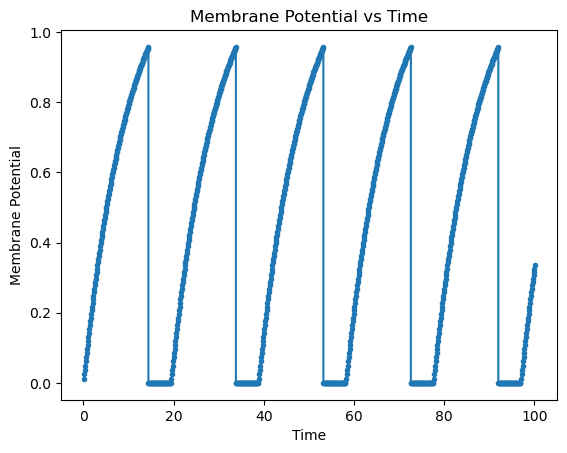

In [6]:
plt.plot(ys,xs, marker='.')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.title('Membrane Potential vs Time')
print("Spike Count: ", spike_count)
print("spike_freq = ", spike_freq)

Spike Count:  5
spike_freq =  0.05


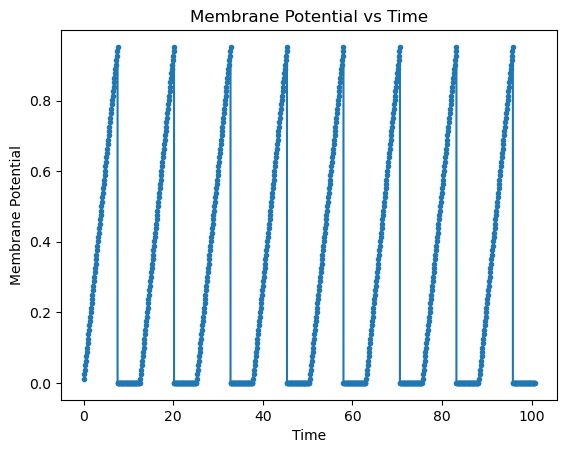

In [7]:
plt.plot(y1s,x1s, marker='.')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.title('Membrane Potential vs Time')
print("Spike Count: ", spike_count)
print("spike_freq = ", spike_freq)

### Question - 2

---

The code is self explanatory

In [8]:
T_rev = 1000
spikes_needed = 50
optimal_freq = spikes_needed/T_rev

In [9]:
#in order to calculate the f- I curve we need the spike frequenct for different values of I
# let us take I in the range of 0.1 to 1.0 with a step size of 0.1
I = np.linspace(0, 4.0, 100)
spike_freqs = []
spike_freqs_1 = []
epsilon = 0.001
for current in I:
    voltages, times, spike_count = lif_1.simulate(T_rev, current, dt)  #T_MAX = 1000
    voltages_1, times_1, spike_count_1 = if_1.simulate(T_rev, current, dt)  #T_MAX = 1000
    spike_freq_1 = spike_count_1/T_rev
    spike_freq = spike_count/T_rev
    if(abs(spike_freq - optimal_freq) < epsilon):
        print ("The value of I for which the neuron fires at 0.05 Hz is: ", current)
    spike_freqs.append(spike_freq)
    spike_freqs_1.append(spike_freq_1)
    

The value of I for which the neuron fires at 0.05 Hz is:  1.2525252525252526


Text(0, 0.5, 'Spike Frequency')

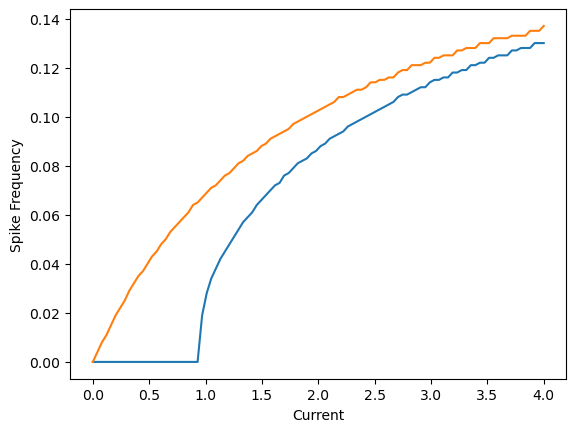

In [10]:
plt.plot(I, spike_freqs)
plt.plot(I, spike_freqs_1)
plt.xlabel('Current')
plt.ylabel('Spike Frequency')

### For Optimal current

Clearly, the optimal frequency required is = 50/1000 = 0.05 Hz, from the graph this occurs at a current of 1.2525 Amps
with a spike frequency as required.

### Changing the threshold membrane potential to find optimal frequency

In [11]:
#in order to calculate the f- I curve we need the spike frequenct for different values of I
# let us take I in the range of 0.1 to 1.0 with a step size of 0.1
Thresholds = np.linspace(0, 4.0, 100)
spike_freqs = []
spike_freqs_1 = []
epsilon = 0.001
I = 1.2525
for thresh in Thresholds:
    lif_2 = LIF(thresh, tau, E_l, R_l, v_reset, t_ref)
    voltages, times, spike_count = lif_2.simulate(T_rev, I, dt)
    voltages_1, times_1, spike_count_1 = if_1.simulate(T_rev, I, dt)
    spike_freq = spike_count/T_rev
    spike_freq_1 = spike_count_1/T_rev
    spike_freqs_1.append(spike_freq_1)
    if(abs(spike_freq - optimal_freq) < epsilon):
        print ("The value of thresh for which the neuron fires at 0.05 Hz is: ", thresh)
    spike_freqs.append(spike_freq)
    
    

The value of thresh for which the neuron fires at 0.05 Hz is:  0.9696969696969697


Text(0, 0.5, 'Spike Frequency')

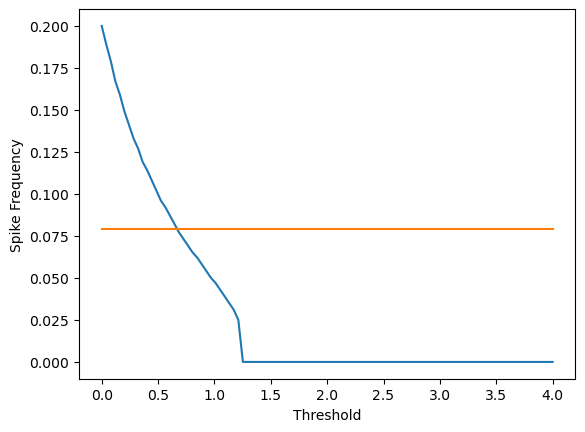

In [12]:
plt.plot(Thresholds, spike_freqs)
plt.plot(Thresholds, spike_freqs_1)
plt.xlabel('Threshold')
plt.ylabel('Spike Frequency')

## Optimal Threshold

From the above experiemtn we can see that the optimal threshold for frequency = 0.5 Hz, can be achieved at a threshold of 0.96 Volts

## Integrate and fire Neuron